In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Создаем датасет

In [34]:
n_samples = 1000
wins = np.random.choice(50, n_samples) + 50
loses = np.random.choice(50, n_samples) + 50
ties = np.random.choice(50, n_samples) + 50
# lvl - зависит от переменных 'wins', 'loses', 'ties'
lvl = ((10*wins - 6.6*loses + 3.3*ties)*0.05 + 3).astype('int64')
# age - независимая переменная
age = np.random.choice(15, n_samples) + 18
data = pd.DataFrame({'age': age, 'wins': wins, 'loses': loses, 'ties': ties, 'lvl': lvl})
data.head()

,age,wins,loses,ties,lvl
0,20,92,62,92,43
1,19,92,88,71,31
2,26,55,75,72,17
3,30,91,57,64,40
4,32,91,50,75,44


In [50]:
X = data[['wins','loses','ties']]
y = data['lvl']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['wins','loses','ties']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# ошибка минимальна

Weights: [ 0.50047796 -0.32971948  0.1655166 ]
Bias: 2.403080461457723
Error: 0.24839396478177955


In [51]:
X = data[['age']]
y = data['lvl']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# тут модель работает значительно хуже.

Weights: [-0.04873596]
Bias: 28.707458809007043
Error: 7.459206969544621


### Создаем переменную 'win_rate' на основании 'wins', 'loses', 'ties'.

In [52]:
data['win_rate'] = data['wins']/(data['wins'] + data['loses'] + data['ties'])
data.head()

,age,wins,loses,ties,lvl,win_rate
0,20,92,62,92,43,0.373984
1,19,92,88,71,31,0.366534
2,26,55,75,72,17,0.272277
3,30,91,57,64,40,0.429245
4,32,91,50,75,44,0.421296


#### Модель без новой переменной:

In [113]:
X = data[['wins','loses']]
y = data['lvl']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['wins','loses']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 0.50911109 -0.33052117]
Bias: 14.190168737944443
Error: 2.0552202692984496


#### Модель с новой переменной, зависящей от изначальных данных:

In [112]:
X = data[['wins','loses','win_rate']]
y = data['lvl']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['wins','loses','win_rate']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# Новый признак улучшил качество.

Weights: [   0.81924929   -0.48830487 -105.62685839]
Bias: 37.996259350833796
Error: 0.4428335824389661


In [150]:
data['total'] = wins + loses + ties
data.head()

,age,wins,loses,ties,lvl,win_rate,total
0,20,92,62,92,43,0.373984,246
1,19,92,88,71,31,0.366534,251
2,26,55,75,72,17,0.272277,202
3,30,91,57,64,40,0.429245,212
4,32,91,50,75,44,0.421296,216


In [149]:
X = data[['wins','ties','total']]
y = data['loses']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['wins','ties','total']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1. -1.  1.]
Bias: -7.105427357601002e-14
Error: 1.6324008811352542e-13


#### Можно построить корреляционную матрицу, где будет видно, как связаны те или иные признаки.

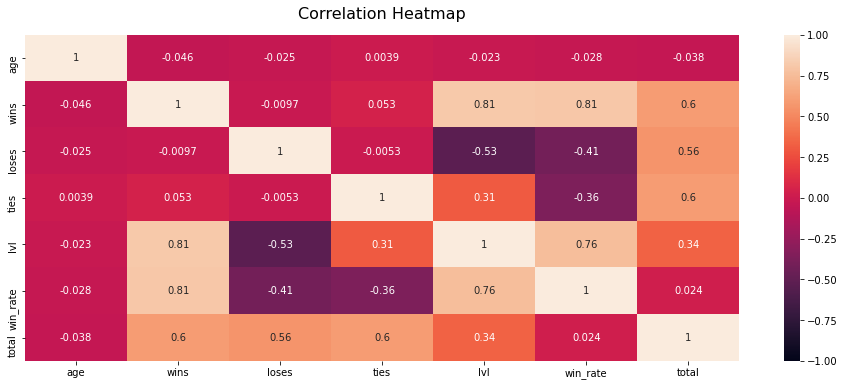

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16);